In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading csv files

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print('Train:\n',df_train.head())
print('Test:\n',df_test.head())

Train:
   image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0
Test:
   image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4


In [3]:
print('Train:\n',len(df_train))
print('Test:\n',len(df_test))

Train:
 1821
Test:
 1821


## We reject testing data because there are no labels assigned to photos so whole dataset consists of 1821 photos

In [4]:
print('Labels:',list(df_train.columns[1:]))

Labels: ['healthy', 'multiple_diseases', 'rust', 'scab']


In [5]:
df = df_train[list(df_train.columns[1:])]
df.sum()

healthy              516
multiple_diseases     91
rust                 622
scab                 592
dtype: int64

<Axes: >

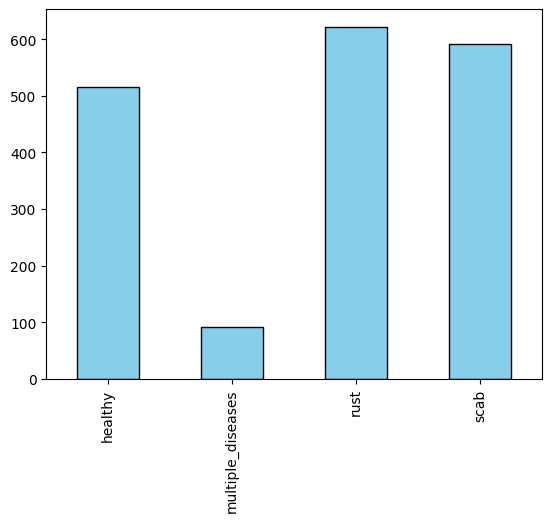

In [6]:
df.sum().plot(kind='bar', color='skyblue', edgecolor='black')

In [7]:
df['class'] = df.apply(lambda row: row.idxmax(), axis=1).astype('category').cat.codes
df['image_id'] = df_train['image_id']
df

,healthy,multiple_diseases,rust,scab,class,image_id
0,0,0,0,1,3,Train_0
1,0,1,0,0,1,Train_1
2,1,0,0,0,0,Train_2
3,0,0,1,0,2,Train_3
4,1,0,0,0,0,Train_4
...,...,...,...,...,...,...
1816,0,0,0,1,3,Train_1816
1817,1,0,0,0,0,Train_1817
1818,1,0,0,0,0,Train_1818
1819,0,0,1,0,2,Train_1819


* Classes and indexes
  + Healthy - 0 
  + multiple_deseases - 1
  + rust - 2
  + scap - 3

# Displaying some photos of different classes

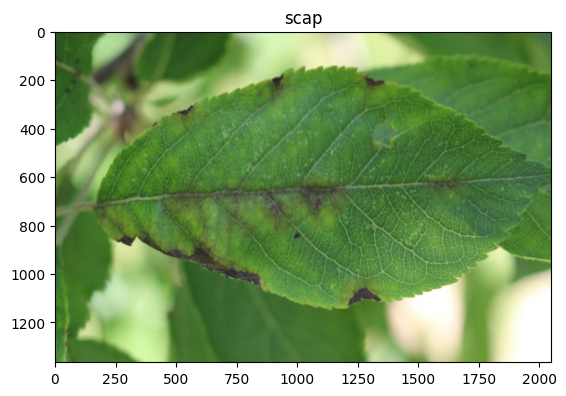

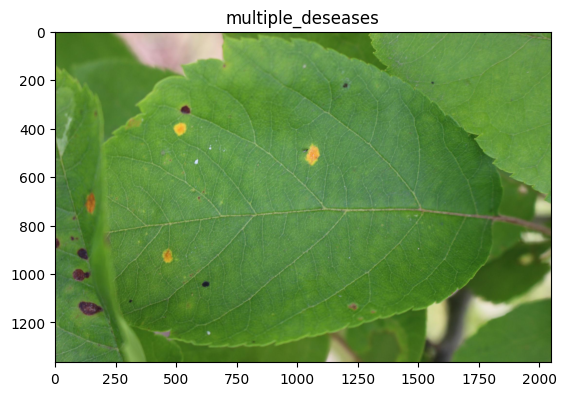

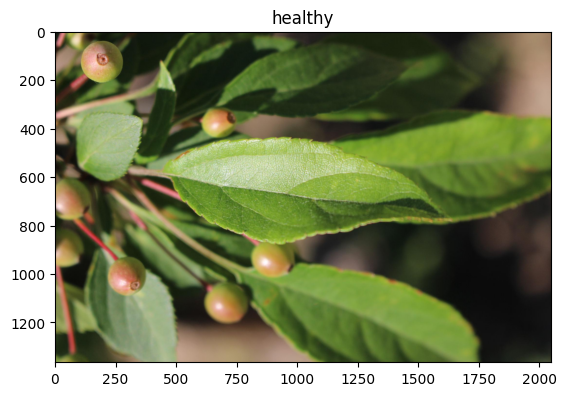

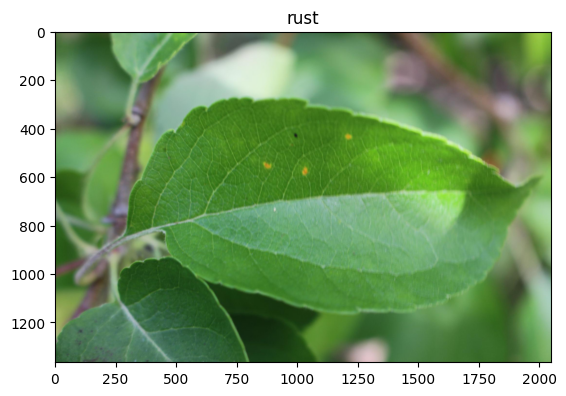

In [8]:
categories = {
    0: 'healthy', 
    1: 'multiple_deseases', 
    2: 'rust', 
    3: 'scap'
}
for category in df['class'].unique():
    random_photo_index = df[df['class'] == category].sample(1).index[0]
    plt.imshow(plt.imread(f"images/{df['image_id'].loc[random_photo_index]}.jpg"))
    plt.title(categories[category])
    plt.show()

# checking images' size

In [9]:
size = []
for image in df['image_id']:
    im = plt.imread(f'images/{image}.jpg')
    size.append(im.shape)


In [10]:
size = np.unique(size)
print(size)

[   3 1365 2048]


### All images are in size 1365x2048x3
#### So resize to 250x250 in dataset class

In [50]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, stratify=df['class'], train_size=0.8)

In [51]:
print('Training dataset:', len(df_train))
print('Test dataset:', len(df_test))

Training dataset: 1456
Test dataset: 365


In [52]:
print('Training dataset:\n', df_train.sum())
print('Test dataset:\n', df_test.sum())

Training dataset:
 healthy                                                            413
multiple_diseases                                                   73
rust                                                               497
scab                                                               473
class                                                             2486
image_id             Train_496Train_1410Train_547Train_544Train_111...
dtype: object
Test dataset:
 healthy                                                            103
multiple_diseases                                                   18
rust                                                               125
scab                                                               119
class                                                              625
image_id             Train_1325Train_1584Train_1750Train_1385Train_...
dtype: object


# Checking the category count 

In [53]:
for i in range(4):
    print(f"Class {i}")
    print('Training data:\n', df_train.sum().iloc[i]/len(df_train))
    print('Test data:\n', df_test.sum().iloc[i]/len(df_test))
    print('------------')

Class 0
Training data:
 0.28365384615384615
Test data:
 0.2821917808219178
------------
Class 1
Training data:
 0.05013736263736264
Test data:
 0.049315068493150684
------------
Class 2
Training data:
 0.34134615384615385
Test data:
 0.3424657534246575
------------
Class 3
Training data:
 0.3248626373626374
Test data:
 0.32602739726027397
------------


### Splitting training set for training and validation (then we can increase training samples by augmenting data

In [54]:
df_training, df_valid = train_test_split(df_train, stratify=df_train['class'], train_size=0.8)

In [55]:
print('Training dataset:', len(df_training))
print('Validation dataset:', len(df_valid))
print('Training dataset:\n', df_training.sum())
print('Validation dataset:\n', df_valid.sum())

Training dataset: 1164
Validation dataset: 292
Training dataset:
 healthy                                                            330
multiple_diseases                                                   59
rust                                                               397
scab                                                               378
class                                                             1987
image_id             Train_1017Train_1801Train_644Train_1578Train_7...
dtype: object
Validation dataset:
 healthy                                                             83
multiple_diseases                                                   14
rust                                                               100
scab                                                                95
class                                                              499
image_id             Train_1748Train_760Train_39Train_356Train_835T...
dtype: object


In [57]:
for i in range(4):
    print(f"Class {i}")
    print('Training data:\n', df_training.sum().iloc[i]/len(df_training))
    print('valid data:\n', df_valid.sum().iloc[i]/len(df_valid))
    print('------------')

Class 0
Training data:
 0.28350515463917525
valid data:
 0.2842465753424658
------------
Class 1
Training data:
 0.0506872852233677
valid data:
 0.04794520547945205
------------
Class 2
Training data:
 0.34106529209621994
valid data:
 0.3424657534246575
------------
Class 3
Training data:
 0.3247422680412371
valid data:
 0.3253424657534247
------------


### Saving to csv files

In [58]:
df_training.to_csv('datasets/training_data.csv')
df_valid.to_csv('datasets/valid_data.csv')
df_test.to_csv('datasets/testing_data.csv')

In [92]:
import torch
from torch.utils.data import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

class PlantDataset(Dataset):
    def __init__(self, path, images_path, transform=None, device='cuda'):
        self.df = pd.read_csv(path)
        self.transform = transform
        self.images_path = images_path
        self.device = device

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        image = plt.imread(f"{self.images_path}/{self.df['image_id'].loc[idx]}.jpg")
        image = self.transform(image) if self.transform is not None else image
        target = np.array(self.df['class'].loc[idx])
        image = image/255.0
        target = np.squeeze(np.eye(4)[target.reshape(-1)])
        image = F.to_tensor(image).to(self.device)
        image = F.resize(image, (250, 250))
        return image, torch.tensor(target).to(self.device)

dataset = PlantDataset('datasets/training_data.csv', 'images')
dataset[0]

(1365, 2048, 3)


/home/adam/anaconda3/envs/torch_cuda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(tensor([[[0.1534, 0.1307, 0.1294,  ..., 0.2403, 0.2796, 0.2708],
          [0.3201, 0.1065, 0.1294,  ..., 0.2354, 0.2920, 0.2784],
          [0.5115, 0.3400, 0.1465,  ..., 0.2427, 0.3088, 0.2800],
          ...,
          [0.0645, 0.0816, 0.0797,  ..., 0.6728, 0.7203, 0.6958],
          [0.0656, 0.0715, 0.0863,  ..., 0.7458, 0.8432, 0.9397],
          [0.0585, 0.0823, 0.0941,  ..., 0.8419, 0.9245, 0.8935]],
 
         [[0.2569, 0.2106, 0.2235,  ..., 0.2246, 0.2521, 0.2434],
          [0.4371, 0.1989, 0.2235,  ..., 0.2197, 0.2646, 0.2509],
          [0.6527, 0.4489, 0.2407,  ..., 0.2270, 0.2814, 0.2525],
          ...,
          [0.1233, 0.1405, 0.1424,  ..., 0.7237, 0.7756, 0.7939],
          [0.1244, 0.1304, 0.1491,  ..., 0.7990, 0.8565, 0.9214],
          [0.1173, 0.1411, 0.1490,  ..., 0.8693, 0.8932, 0.8433]],
 
         [[0.1008, 0.0683, 0.0902,  ..., 0.1776, 0.1894, 0.1806],
          [0.2516, 0.0606, 0.0902,  ..., 0.1727, 0.2018, 0.1882],
          [0.3907, 0.2650, 0.1073,  ...,